# Analyzing A Network of Synaptic Interactions [100 Points]

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp

## Part I

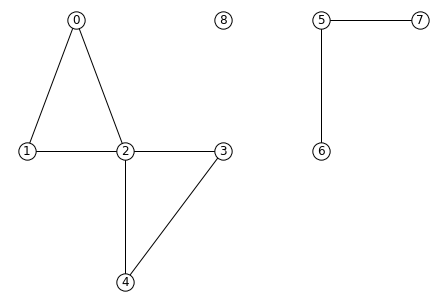

In [3]:
#Part I-1
#Implement your code and show the visualization

G = nx.Graph()
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(2,4)
G.add_edge(3,4)
G.add_edge(5,6)
G.add_edge(5,7)
G.add_node(8)

options = {
    "font_size": 12,
    # "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    # "linewidths": 5,
    # "width": 5,
}

pos = {0: (0.5, 1), 1: (0,0), 2: (1,0), 3: (2, 0), 4: (1,-1), 5: (3,1), 6: (3,0), 7: (4,1), 8: (2,1)}
nx.draw(G, pos, **options, with_labels = True)


In [4]:
#Part I-2.a
#Implement your code and write the answer in the Markdown cell right below
G = nx.read_graphml("Assignment1_Part1-2_cities_data.graphml") # parse graphml file

# print(G.edges(data=True))

# GTest = nx.Graph()

# GTest.add_edge('Hialeah','Cuba')
# GTest.add_edge('Hialeah', 'Orlando')

# nx.draw(GTest, with_labels=True)

Type your answer for Part I-2.a here
_______________________________________________________________________________

number of nodes: 
number of edges: 
number of the pairs : 

In [5]:
#Part I-2.b
#Implement your code and show the visualization of Question 4
def cities_within_100(G, city_list):
    '''
    Input
    G: graph
    city_list: list of strings (names of cities in G)

    Output
    S: subgraph of G that only contains edges between cities in “city_list” and directly neighboring cities that are less than 100 miles away
    '''
    
    # temporary graph
    G2 = nx.Graph()

    # iterate through edges, if edge weight is < 100, keep it
    lEdges = G.edges(data=True)

    for city in city_list:
        for edge in lEdges:
            # print(edge)
            if edge[2]['weight'] < 100 and city == edge[0]: # if first point of an edge is THIS city and dist <100
                G2.add_edge(city, edge[1])
            elif edge[2]['weight'] < 100 and city == edge[1]:  # if second point of an edge is THIS city
                G2.add_edge(city, edge[0])

    # options = {
    # # "font_size": 6,
    # # "node_size": 3000,
    # "node_color": "white",
    # "edgecolors": "black",
    # # "linewidths": 5,
    # # "width": 5,
    # }

    # nx.draw(G2, **options, with_labels=True)   
    return G2


# ################ TEST CODE RM LATER #######################
# lNodes = G.nodes(data=True)
# city_list = []
# [city_list.append(lNode[0]) for lNode in lNodes]
# # print(city_list)
# cities_within_100(G, ["Rochester, NY","Tacoma, WA"])


GCycle max eigen:  1.9999999999999993
Average Degree 1.0
GClique max eigen:  9.0
Average Degree 4.5
GStar max eigen:  3.1622776601683795
Average Degree 1.0


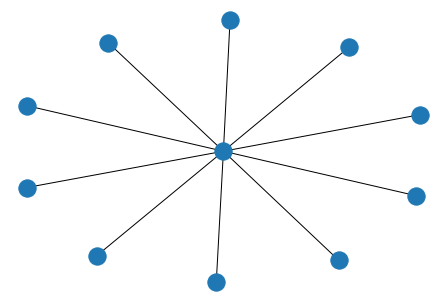

In [6]:
#Part I-3
#Implement your code and write the answer in the Markdown cell right below
N = 10
# Cycle Network
GCycle = nx.cycle_graph(N)
[w, v] = np.linalg.eig(nx.to_numpy_matrix(GCycle))
print("GCycle max eigen: ", max(w))
print("Average Degree", len(GCycle.edges)/10)
# nx.draw(GCycle)


# Clique (complete) Network
GClique = nx.complete_graph(N)
[w, v] = np.linalg.eig(nx.to_numpy_matrix(GClique))
print("GClique max eigen: ",max(w))
print("Average Degree", len(GClique.edges)/10)
# nx.draw(GClique)

# star network
GStar = nx.star_graph(N)
[w, v] = np.linalg.eig(nx.to_numpy_matrix(GStar))
print("GStar max eigen: ",max(w))
print("Average Degree", len(GStar.edges)/10)
nx.draw(GStar)



Type your answer for Part I-3 here
_______________________________________________________________________________

The Clique's adjacency matrix has the largest maximum eigen value, star the second largest, and ring has the smallest. 

The largest eigen value of an adjacency matrix should always be less than the maximum node degree of that network. The eigen values calculated above agree with their respective graphs. The ring graph has a maximum degree of 2, which is just greater than its max eigen value of 1.99. The ring graph's average degree although is 1, because it has the same number of edges as nodes. All nodes in the Complete/Clique graph have the same degree of 9 since they are fully connected, which is equal to its max eigen value of 9. The average of this graph is 4.5 again due to the way average degree is calculated which is L/N. The Star network's maximum degree is that of the center node and is 10, which is greater than its max eigen which is 3.16. The average degree of the star is 1, because it has 10 nodes and 10 edges.

## PART II

In [7]:
#Part II-1
#Implement your code here and write the answer in the Markdown cell right below
G = nx.read_gml("Assignment1_Part2_lesmis_data.gml")
# print(G.nodes)

# A network is connected if all pairs of nodes in the network are connected
print(nx.is_connected(G))

True


Type your answer for Part II-1 here
__________________________________

Yes this graph is connected

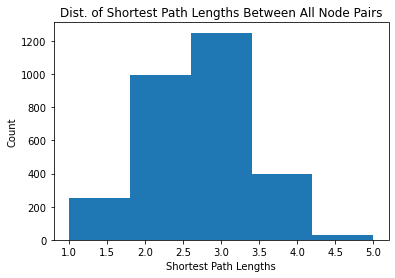

In [8]:
#Part II-2
#Implement your code and plot your distribution

paths = dict(nx.all_pairs_shortest_path(G))
# print(paths["Myriel"])

datavec = []
pathlengths = {}
usedPersons = []

# print(pathlengths)
# iterate through each person
for person in G.nodes:
    usedPersons.append(person) # keep track of who we have counted
    # get all the path lengths except for the first
    for person2 in G.nodes:
        if person2 == person:   # skip same person
            continue
        if person2 in usedPersons:  # skip people already counted
            continue
        else:
            pathlength = len(paths[person][person2])-1# find the length between these two people
            # print(pathlength)
            datavec.append(pathlength)

# account for double counts
for path in pathlengths:
    pathlengths[path] /= 2
# print(pathlengths)

################ plotting stuff #####################

# print(stuff)


plt.hist(datavec, 5)
plt.ylabel("Count")
plt.xlabel("Shortest Path Lengths")
plt.title("Dist. of Shortest Path Lengths Between All Node Pairs")
plt.show()


In [9]:
#Part II-3
#Implement your code here and write the answer in the Markdown cell right below
#rq come back to this
lEdges = G.edges(data=True) # edges with weights
lNodes = G.nodes()
# print(lEdges[0])

# Build P
P = np.zeros((len(lNodes),len(lNodes))) # P is a matrix with dimensions node x node
# print(len(lNodes))

for person in lNodes: # for each person
    
    # for each edge


SyntaxError: unexpected EOF while parsing (<ipython-input-9-b8ce94b5a8f7>, line 14)

Type your answer for Part II-3 here
_______________________________________________________________________________


## Part III

In [ ]:
#Load the graph
G = nx.read_graphml("Assignment1_Part3_drosophila_medulla_data.graphml")
print(len(G.nodes))

1781


In [ ]:
#Part III-1
#Implement your code and write the answer in the Markdown cell right below

largest_weak = max(nx.weakly_connected_components(G), key=len)
# print(len(largest_cc))

percentage = len(largest_weak)/len(G.nodes)*100
print(percentage)

99.38236945536215


Percentage of largest weakly connected component: 99.38%
__________________________________

In [ ]:
#Part III-2
#Implement your code and write the answer in the Markdown cell right below

largest_strong = max(nx.strongly_connected_components(G), key=len)
# print(len(largest))

percentage = len(largest_strong)/len(G.nodes)*100
print(percentage)


44.07636159460977


Percentage of largest strongly connected component: 44.08%
_______________________________________________________________________________


In [ ]:
#Part III-3
#Implement your code and show the distribution

# rq come back to this

## PART IV

In [40]:
#Part IV-1 

# print(G.edges)
data1 = np.loadtxt("Assignment1_Part4_github_data.txt")

# print(data1.shape[0])
# modify name 
first_col = []*2

for i in range(data1.shape[0]):
    first_col.append(("user_"+str(data1[i][0]), "project_"+str(data1[i][1])))
    
# print(first_col)

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(first_col[:][0], bipartite=0)
B.add_nodes_from(first_col[:][1], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from(first_col)
# print(B.nodes)
print(nx.is_connected(B))


False


Type your answer for Part IV-1 here
_______________________________________________________________________________
People with most number of shared memberships:

In [ ]:
#Part IV-2 (Continue)
#Implement your code and write the answer in the Markdown cell right below

Type your answer for Part IV-2 here
_______________________________________________________________________________

Projects with most number of shared users:

## PART V

In [307]:
#Part V-1
#Implement your code and write the answer in the Markdown cell right below
G = nx.read_edgelist("Assignment1_Part5_language_data.txt")
# print(G.edges)

print(nx.is_directed_acyclic_graph(G))

False


The Graph is NOT a DAG
_______________________________________________________________________________



In [ ]:
#Part V-2
#Implement your code 

In [ ]:
#Part V-3
#Implement your code and write the answer in the Markdown cell right below

Type your answer for Part V-3 here
_______________________________________________________________________________
